# AIN429 - Data Mining Laboratory
## Instructor: Suat Özdemir
## Assistant: Ahmet Alkılınç
## Subject: Classification
## Student Info: Can Ali Ateş
## Student ID: 2200765002

# Importing Libraries and Dataset

In [ ]:
# Import Necessary Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import the dataset.
df = pd.read_csv('data.csv')

# Display the data frame shape.
print(f'Data Frame Shape: {df.shape}\n')

# Display the first 5 record of data frame.
pd.set_option('display.max_columns', None)
df.head()

Data Frame Shape: (78096, 38)



,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


**'?' values represent the NaN values in my view, so I will convert them into NaN values as a first step of preprocessing.**

# Data Preprocessing & Analysis

In [ ]:
# Convert '?' values into NaN values. 
df = df.replace('?', np.nan)
    
# Display the data frame shape.
print(f'Data Frame Shape: {df.shape}\n')

# Display the first 5 record of data frame.
pd.set_option('display.max_columns', None)
df.head()

Data Frame Shape: (78096, 38)



,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**'?' values converted into NaN values, let's check the NaN counts of columns.**

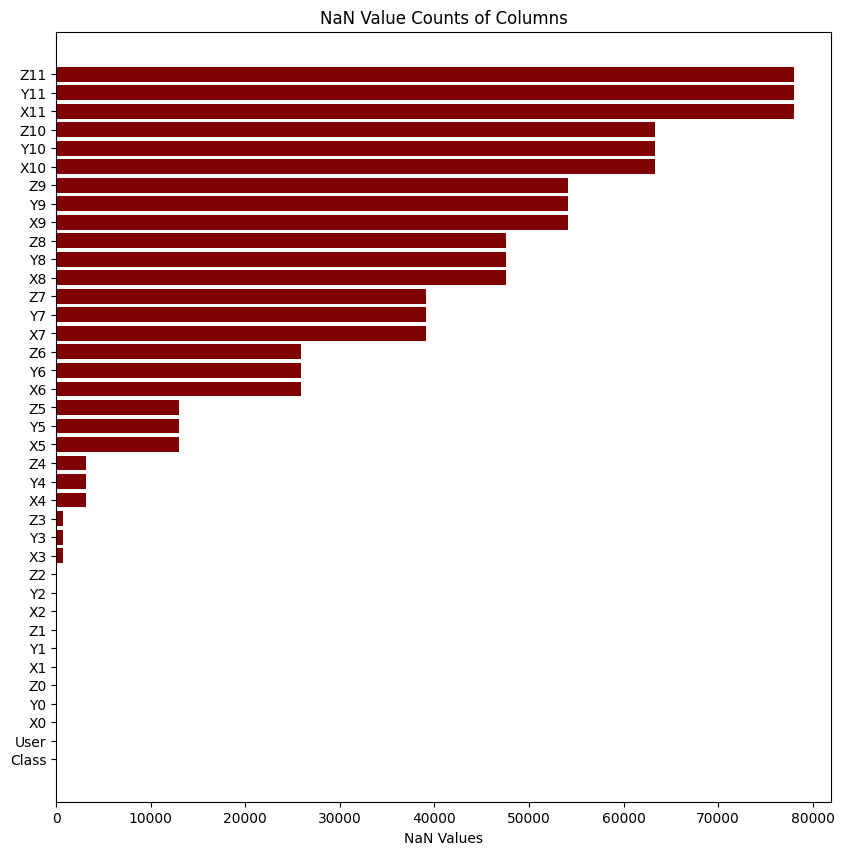

In [ ]:
# Create a barplot to display NaN counts of columns.
fig = plt.figure(figsize = (10, 10))
plt.barh(df.columns, df.isnull().sum(), color ='maroon')
plt.xlabel("NaN Values")
plt.title("NaN Value Counts of Columns")
plt.show()

**As shown in the BarH plot, most of the columns contain too many NaN values relative to the record count. I will not try to fill these columns because the NaN value percentage is too high, dropping these columns will be the best option.**

In [ ]:
# Drop columns which have high NaN percentage.
df = df.drop(df.iloc[:, 17:], axis=1)

# Drop User feature which just contain user numbers.
df = df.drop(['User'], axis=1)

# Drop the first row which contains just 0 value.
df = df.drop(0)

# Display the data frame shape.
print(f'Data Frame Shape: {df.shape}\n')

# Display the first 5 record of data frame.
df.head()

Data Frame Shape: (78095, 16)



,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019
5,1,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993


**Columns that have a high NaN percentage, User which contains just user numbers, and the first row which contains just 0 value are dropped. Now, I will check the count of the NaN values of columns that have sensible NaN percentages.**

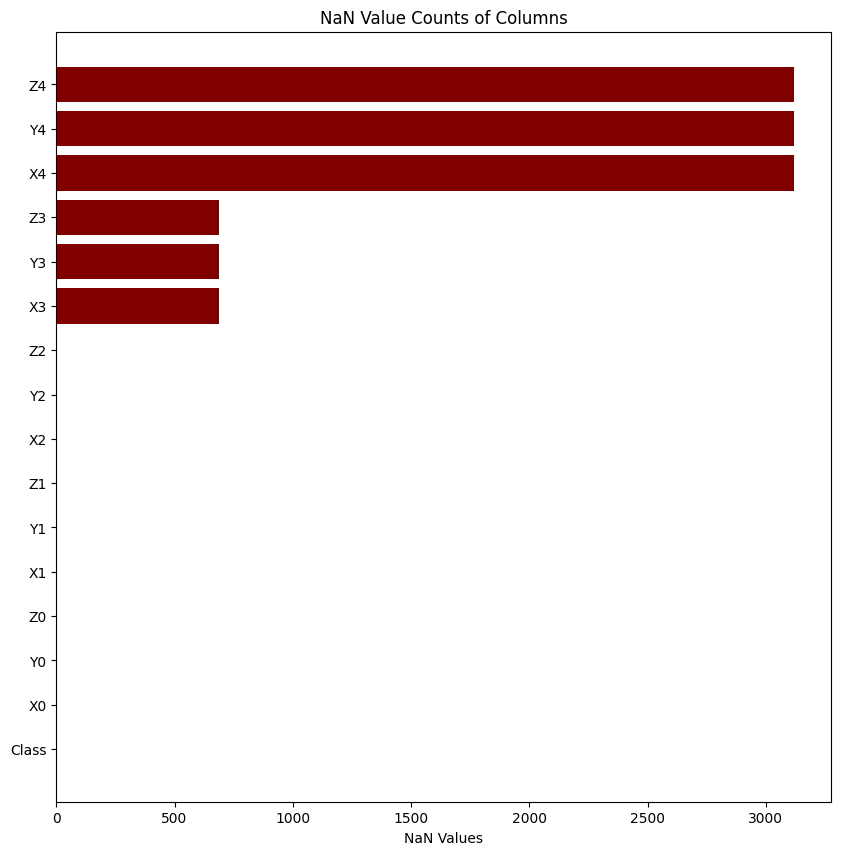

In [ ]:
# Create a barplot to display NaN counts of columns.
fig = plt.figure(figsize = (10, 10))
plt.barh(df.columns, df.isnull().sum(), color ='maroon')
plt.xlabel("NaN Values")
plt.title("NaN Value Counts of Columns")
plt.show()

**Percentage of the NaN values respect to all records are sensible, so I can fill them with the median of the relevant column.**

In [ ]:
# Fill the missing values with the median of the relevant column.
df = df.fillna(df.median())

# Check NaN values after filling them with median.
df.isnull().sum()

Class    0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
dtype: int64

**Missing value operations finished, now I will check the data types of columns.**

In [ ]:
# Check data types of the columns.
df.dtypes

Class      int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
dtype: object

**Columns that contain float values are shown as object columns, so I need to convert them into float64 data type.**

In [ ]:
# Convert the object columns into float.
df[['X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4']] = df[['X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4']].apply(pd.to_numeric)

# Check the data types after convertion operation.
df.dtypes

Class      int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3       float64
Y3       float64
Z3       float64
X4       float64
Y4       float64
Z4       float64
dtype: object

**Data type conversion operations are finished, now I will check the distribution of class labels.**

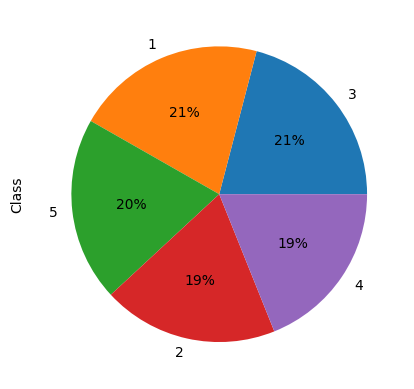

In [ ]:
# Display the distribution of the classes as pie chart.
df['Class'].value_counts().plot(kind='pie', y='Class', autopct='%1.0f%%')
plt.show()

**The distribution of the labels is normal, so our model will not have bias depending on the distribution of the label counts.**

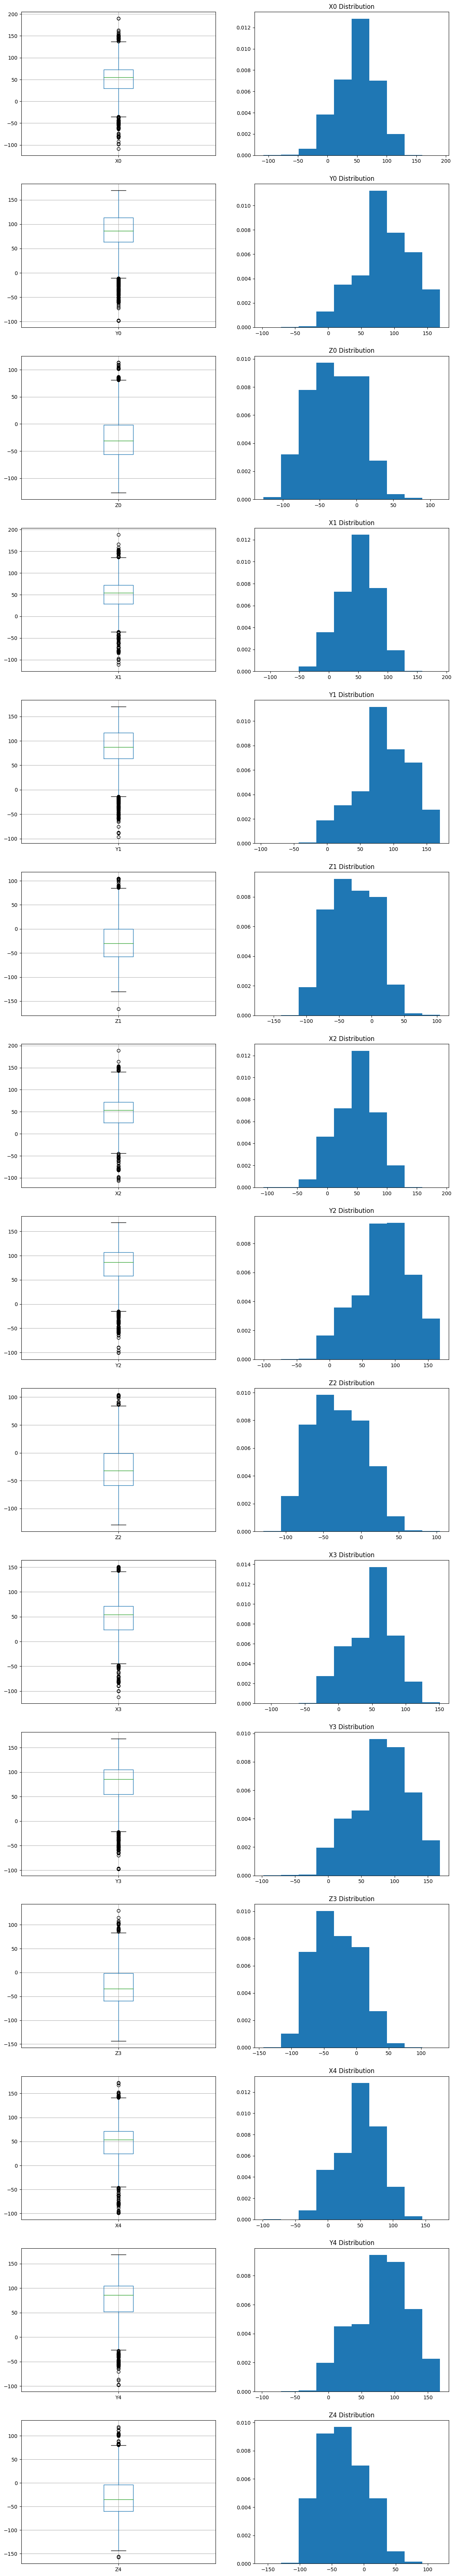

In [ ]:
# Create Boxplot and Histogram of each feature column to detect possible outliers.
plt.figure(figsize=(15, 90))
for index, column in enumerate(df.columns[1:]):
    plt.subplot(15, 2, 2*index + 1)
    df.boxplot([column])
    plt.subplot(15, 2, 2*index + 2)
    plt.hist(df[column], density=True)
    plt.title(f'{column} Distribution')
plt.show()

**I evaluated the boxplots and histograms of each columns, none of the columns contain certain outliers based on this evaluation. Depending on the spread and skewness properties of the histograms are considered, each point can evaluate as a part of the distribution.**  

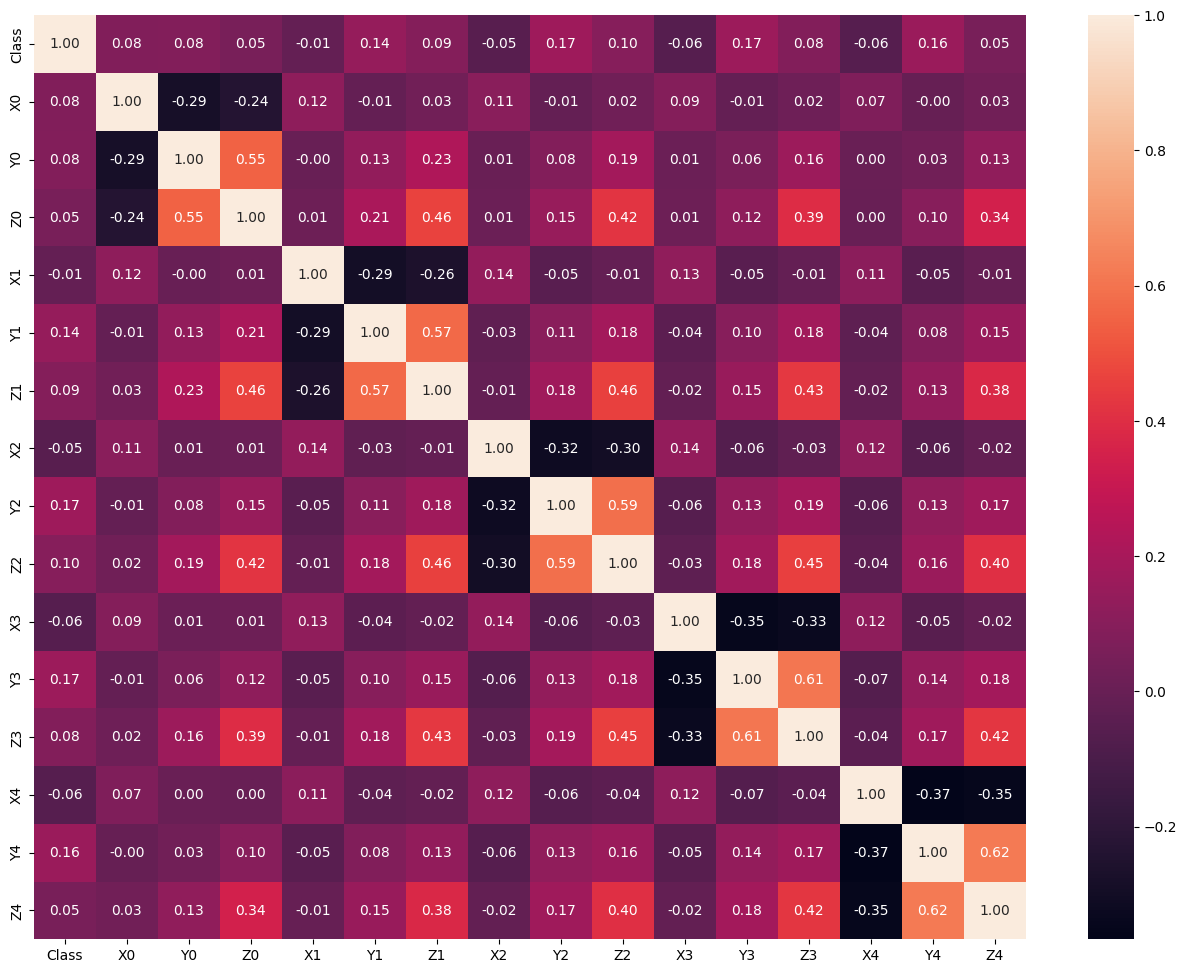

In [ ]:
# Plot Correlation Heatmap to Observe Features Relationships.
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot=True, fmt = '.2f')
plt.show()

**As shown in the data frame heatmap, most of the features are independent of each other so each feature has importance for the classification.**

In [ ]:
# Display the data frame shape after preprocessing finished.
print(f'Data Frame Shape: {df.shape}\n')

# Display the first 5 record of data frame after preprocessing finished.
df.head()

Data Frame Shape: (78095, 16)



,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146
5,1,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906


### Results of the Data Preprocessing & Analysis Step
* **?' values turned into NaN values.**
* **21 feature dropped because of the high NaN percentage.**
* **User feature dropped because it contains user numbers that are unnecessary for the classification.**
* **First row dropped because it contains just 0 values.**
* **10000+ missing value filled with median of the related feature.**
* **Data types of object columns which contain float values, converted to float data type.**
* **Class distribution is normal, so dataset does not contain any bias.**
* **Dataset features have different skewness types such as right-skewed, symmetric, and left-skewed. Dataset does not contain certain outliers when the skewness and spread properties of the features are observed.**
* **Most of the features are independent from each other, so each feature has importance for the classification.**

# Implementing Methods

**Split the dataset into train and test set**

In [ ]:
# Split features and class labels.
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Train - Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression Model

In [ ]:
# Create a Logistic Regression model.
logistic = LogisticRegression(max_iter = 1000)

# Train the model.
logistic.fit(X_train, y_train)

# Make Predictions.
logistic_pred = logistic.predict(X_test)

# Display the Accuracy.
print(f'Logistic Regression Accuracy: {logistic.score(X_test, y_test):.2f}')

Logistic Regression Accuracy: 0.62


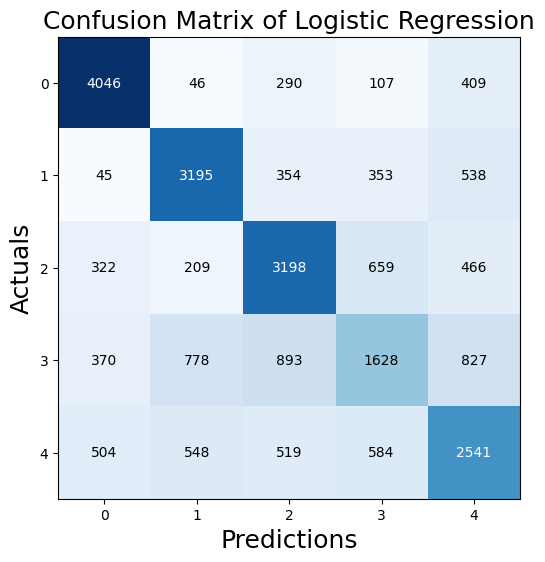

In [ ]:
# Plot Confusion Matrix of Logistic Regression
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, logistic_pred), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of Logistic Regression', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of Logistic Regression.
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           1       0.77      0.83      0.79      4898
           2       0.67      0.71      0.69      4485
           3       0.61      0.66      0.63      4854
           4       0.49      0.36      0.42      4496
           5       0.53      0.54      0.54      4696

    accuracy                           0.62     23429
   macro avg       0.61      0.62      0.61     23429
weighted avg       0.61      0.62      0.62     23429



### K-NN Model

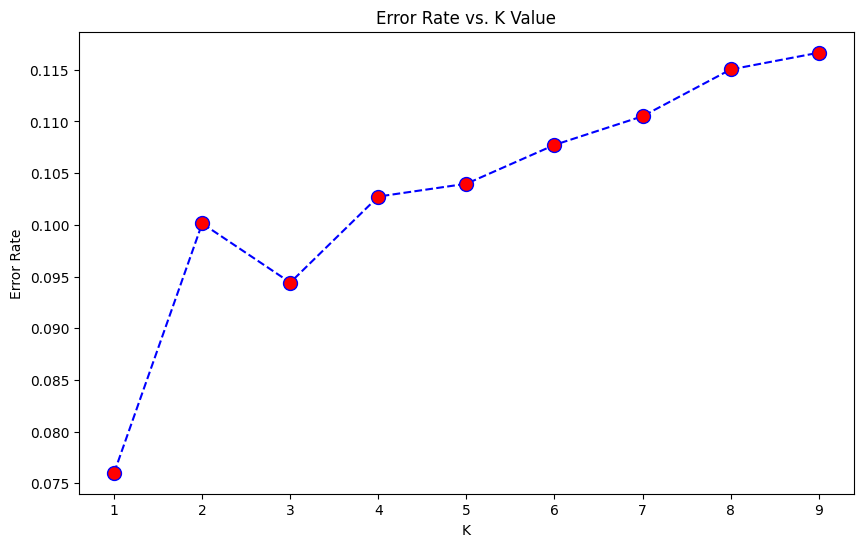

In [ ]:
# Calculate the error rate depend on k-value.
error_rate = []
for i in range(1, 10):
    optimal_knn = KNeighborsClassifier(n_neighbors=i)
    optimal_knn.fit(X_train,y_train)
    pred = optimal_knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

# Plot Error Rate - K value graph.
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

**Optimal k-value is 3 for this dataset according to Error Rate vs K graph, so I will implement K-NN Model with 3 Nearest Neighbor.**

In [ ]:
# Create a KNN model.
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model.
knn.fit(X_train,y_train)

# Make predictions.
knn_pred = knn.predict(X_test)

# Display the accuracy of the model on test set.
print(f'K-NN Accuracy: {knn.score(X_test, y_test):.2f}')

K-NN Accuracy: 0.91


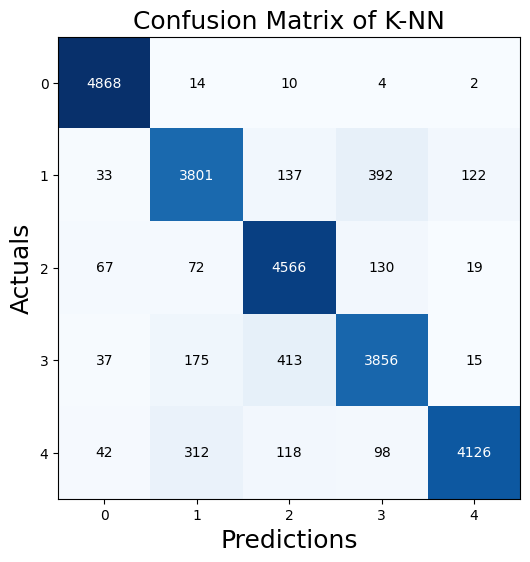

In [ ]:
# Plot Confusion Matrix of KNN.
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn_pred), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of K-NN', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of KNN.
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98      4898
           2       0.87      0.85      0.86      4485
           3       0.87      0.94      0.90      4854
           4       0.86      0.86      0.86      4496
           5       0.96      0.88      0.92      4696

    accuracy                           0.91     23429
   macro avg       0.91      0.90      0.90     23429
weighted avg       0.91      0.91      0.91     23429



### Random Forest Model

In [ ]:
# Create a Random Forest Model
forest = RandomForestClassifier()

# Train the model
forest.fit(X_train, y_train)

# Make predictions with model
forest_preds = forest.predict(X_test)

# Display the accuracy of the model on test set.
print(f'Random Forest Accuracy: {forest.score(X_test, y_test):.2f}')

Random Forest Accuracy: 0.97


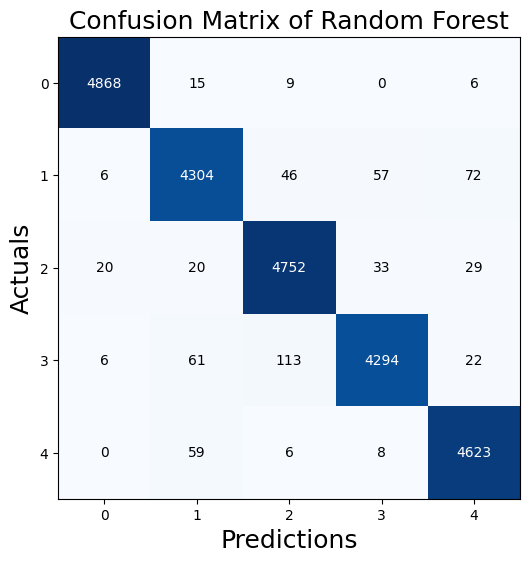

In [ ]:
# Plot Confusion Matrix of Random Forest.
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, forest_preds), figsize=(6, 6), cmap=plt.cm.Blues) 
plt.xlabel('Predictions', fontsize=18) 
plt.ylabel('Actuals', fontsize=18) 
plt.title('Confusion Matrix of Random Forest', fontsize=18) 
plt.show()

In [ ]:
# Display classification report of Random Forest.
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4898
           2       0.97      0.96      0.96      4485
           3       0.96      0.98      0.97      4854
           4       0.98      0.96      0.97      4496
           5       0.97      0.98      0.98      4696

    accuracy                           0.97     23429
   macro avg       0.97      0.97      0.97     23429
weighted avg       0.97      0.97      0.97     23429



# Report

## Overview of the Problem

**In this assignment, I evaluated different classification methods on the same dataset. This evaluation is based on the observation of the classification performance of algorithms.**

## Data Preprocessing & Analysis
1. **'?' values are converted into NaN values, then NaN values of the columns are visualized with BarH plot. Depending on this visualization, 21 features have a high NaN percentage. So, all of these features are dropped.**
2. **The User feature which contains user numbers and the first row which contains just 0 values are dropped.**
3. **NaN values of the columns which have low NaN percentages are visualized with BarH plot, Depending on this visualization 10000+ missing values are filled with a median of the related feature.**
4. **Data types of object columns that contain float values are converted to float data types.**
5. **Class distribution is visualized with Pie Chart. Depending on this visualization, the label distribution of the dataset is normal, so the dataset does not contain any bias.**
6. **Barplot and Histogram of the features are visualized for outlier analysis. Depending on this visualization, the dataset features have different skewness types such as right-skewed, symmetric, and left-skewed. The dataset does not contain certain outliers when the skewness and spread properties of the features are observed.**
7. **The correlation of features is visualized with Heatmap. Depending on this visualization, most of the features are independent of each other so each feature has importance for the classification.**

## Implementing Methods
**The dataset was split into train and test sets with 70% - 30% respectively.**

**Logistic Regression, K-NN and Random Forest classifiers are implemented.**

### Experimental Results
**Logistic Regression Accuracy: 0.62**

**K-NN Accuracy: 0.91**

**Random Forest Accuracy: 0.97**

### Comparison of the Algorithms

**Logistic and Random Forest are Eager Learners while K-NN is a Lazy Learner. Depending on these properties, the training process of the K-NN is faster than both the Logistic Regression and Random Forest but at the test process, K-NN checks all train points so it works slower than both the Logistic Regression and Random Forest.**

**Logistic Regression creates a Linear Decision Boundary, so it can not handle the non-linearly separable datasets well. Because of this reason, it has low accuracy than both the K-NN and Random Forest.**

**Random Forest can handle non-linearly separable datasets well than K-NN because K-NN uses just the distances between train points and test point while Random Forest uses decision boundaries. Because of this reason, Random Forest has higher accuracy than K-NN.**

**As an interpretation over the confusion matrixes of the classification algorithms; class 1 has higher True Positive than other classes for all of the models. The remained classes True Positive, False Positive and False Negative values are changing depending on the classification algorithms. When the all confusion matrices are investigated, K-NN and Random Forest can make more accurate prediction than Logistic Regression.** 

**As an interpretation of the classification reports of the classification algorithms; depending on the distribution of the labels while train - test split process, all of the models can predict class 1 accurately. But the other classes' prediction precision and recall values are changing. Logistic regression can not handle most of the classes which have fewer class instances, while K-NN and Random Forest can handle them accurately. This situation occurs because of the properties of the models because Logistic Regression is a linear-based classification algorithm that creates a linear decision boundary and learns the differences between the classes directly from this decision boundary. K-NN does not use linear decision boundary and it uses just distances between train points and test point. Random Forest can create a decision boundary that is not linear, so it can not affect the linear separability of the dataset.**

**As a result, all of the classification algorithms predict the true label of the test points with higher than %50 accuracies which means all of the classification algorithms that I used are more successful than random classifiers; so, all classifiers that I used are appropriate for the problem but the dataset is not linearly separable so the use of a classifier which can create non-linear decision boundary is more convenient. Based on this approach, Random Forest is the best algorithm that I use to classify this dataset.**